## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[256, 128], drp_ratio=0.2):
    input_layer=keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i==0:
            x=keras.layers.Dense(units=n_units,activation='relu')(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x=keras.layers.Dense(units=n_units,activation='relu')(x)
            x = Dropout(drp_ratio)(x)
    out=keras.layers.Dense(units=output_units, activation="softmax")(x)
    
    model=keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 512
MOMENTUM = 0.95
PATIENCE=[10,25]

In [8]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping
results = {}

for pat in PATIENCE:
    keras.backend.clear_session()
    earlystop = EarlyStopping(monitor="val_loss", patience=pat, verbose=1)
    
    print ('The patience is : %f' % (pat))
    model=build_mlp(input_shape=x_train.shape[1:], drp_ratio=0.2)
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "patience : %s" % str(pat)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    


W0724 18:38:16.684450  8288 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 18:38:16.691015  8288 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 18:38:16.733741  8288 deprecation.py:506] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


The patience is : 10.000000


W0724 18:38:16.872047  8288 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0724 18:38:17.040867  8288 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 27s 538us/step - loss: 2.2249 - acc: 0.1794 - val_loss: 2.0513 - val_acc: 0.2881
Epoch 2/50
50000/50000 [==============================] - 8s 151us/step - loss: 2.0324 - acc: 0.2653 - val_loss: 1.9308 - val_acc: 0.3250
Epoch 3/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.9507 - acc: 0.3008 - val_loss: 1.8680 - val_acc: 0.3482
Epoch 4/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.9010 - acc: 0.3202 - val_loss: 1.8293 - val_acc: 0.3643
Epoch 5/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.8665 - acc: 0.3328 - val_loss: 1.7915 - val_acc: 0.3743
Epoch 6/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.8350 - acc: 0.3443 - val_loss: 1.7678 - val_acc: 0.3776
Epoch 7/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.8068 - acc: 0.3559 - val_loss: 1.7404 -

50000/50000 [==============================] - 8s 155us/step - loss: 1.7581 - acc: 0.3773 - val_loss: 1.6882 - val_acc: 0.4110
Epoch 10/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.7399 - acc: 0.3853 - val_loss: 1.6700 - val_acc: 0.4183
Epoch 11/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.7209 - acc: 0.3931 - val_loss: 1.6555 - val_acc: 0.4211
Epoch 12/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.7074 - acc: 0.3961 - val_loss: 1.6410 - val_acc: 0.4298
Epoch 13/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6912 - acc: 0.4009 - val_loss: 1.6310 - val_acc: 0.4328
Epoch 14/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6806 - acc: 0.4045 - val_loss: 1.6166 - val_acc: 0.4383
Epoch 15/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.6703 - acc: 0.4106 - val_loss: 1.6033 - val_acc: 0.4380
Epoch 16/50
50000/50000 [==============

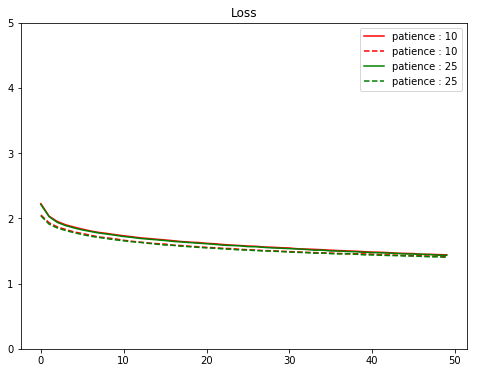

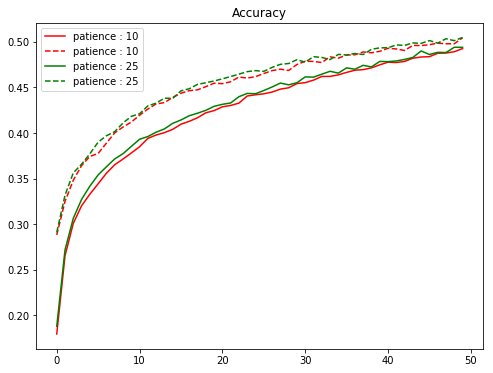

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()